In [19]:
options(warn = -1)
pacotes <- c("ggplot2", "dplyr", "rbcb", "seasonal", "ggthemes")
for(i in pacotes){
    library(i, character.only = T)
}

In [20]:
gasolina <- get_series(c(Consumo = 1393), start_date = "2003-02-01", end_date = "2020-02-01")
ibc <- get_series(c(IBC = 24364), end_date = "2020-02-01")
alcool <- get_series(c(Consumo = 1401), start_date = "2003-02-01", end_date = "2020-02-01")

In [21]:
var_ibc <- (diff(ibc$IBC, 1)/ibc$IBC[1:length(ibc$IBC)-1])
var_ibc <- cumprod((1+var_ibc))-1

In [22]:
preco <- get_series(c(Preço = 4458), start_date = "2003-02-01")
preco$Preço <- cumprod((1+(preco$Preço/100)))-1
preco_renda <- ((1+preco$Preço)/(1+var_ibc))*271

In [23]:
gaso_seas <- seas(ts(gasolina$Consumo, start = c(2003,02), frequency = 12))
gaso_seas1 <- data.frame(gaso_seas$data)$final
gaso_seas1 <- data.frame(Data = gasolina$date, Consumo = gaso_seas1)

In [24]:
pop <- 180708*(1.00074)^(1:205)

In [25]:
alcool_saz <- seas(ts(alcool$Consumo, start = c(2003,02), frequency = 12))
alcool_saz1 <- data.frame(alcool_saz$data)$final

In [26]:
consumo_preco <- data.frame(Data = gasolina$date,
                            Consumo = gaso_seas1$Consumo*100000/pop,
                            Preco_Renda = preco_renda*100000/pop,
                            Consumo_Alcool = alcool$Consumo*100000/pop)

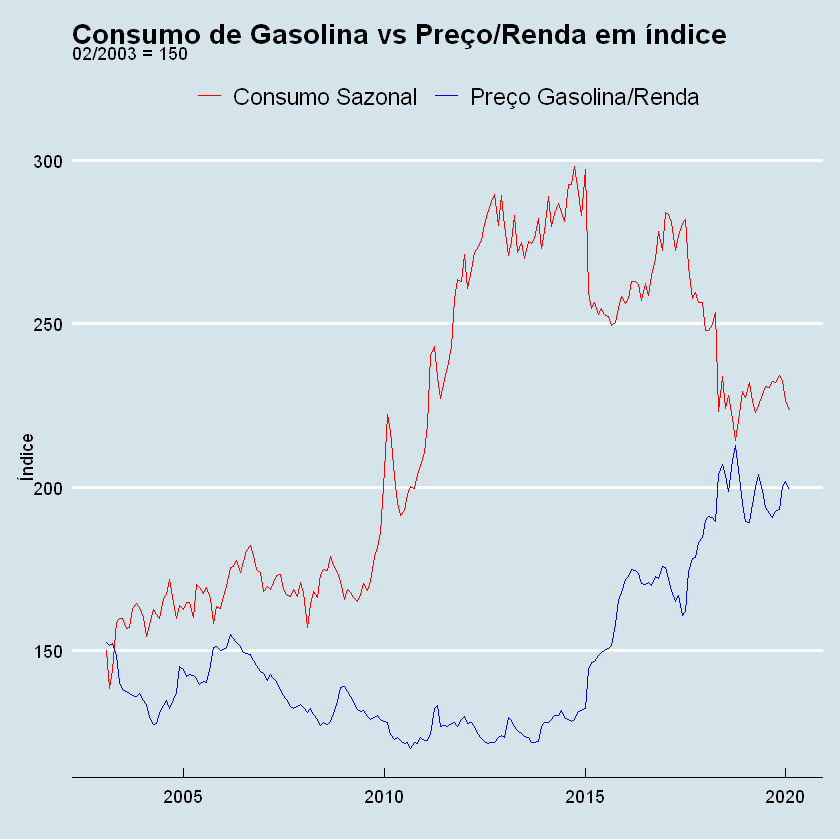

In [27]:
ggplot(consumo_preco, aes(Data))+
  geom_line(aes(y = Consumo, col = "Consumo Sazonal"))+
  geom_line(aes(y = Preco_Renda, col ="Preço Gasolina/Renda"))+
  labs(x = "", y = "Índice", title = "Consumo de Gasolina vs Preço/Renda em índice",
       subtitle = "02/2003 = 150")+
  scale_colour_manual("", values = c("Consumo Sazonal" = "red",
                                     "Preço Gasolina/Renda" = "blue"))+
  theme_economist()

In [28]:
consumo2 <- data.frame(Data = gasolina$date,
                            Consumo = gaso_seas1$Consumo*100000/pop,
                            Preco_Renda = preco_renda*100000/pop,
                            Consumo_Alcool = alcool_saz1*100000/pop)

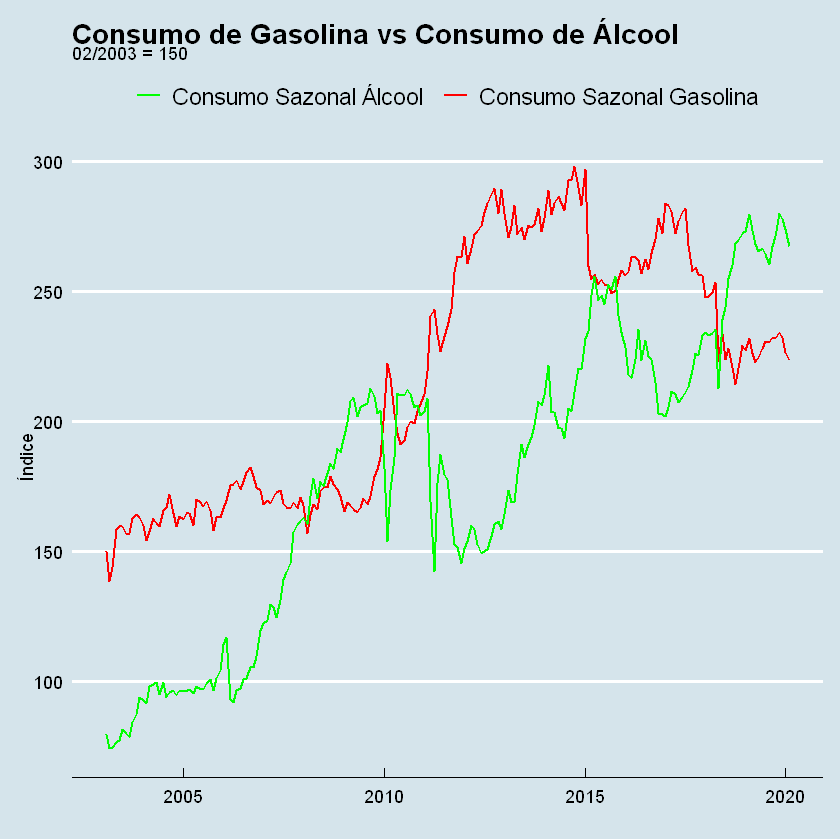

In [29]:
ggplot(consumo2, aes(Data))+
  geom_line(aes(y = Consumo, col = "Consumo Sazonal Gasolina"), size = 0.7)+
  geom_line(aes(y = Consumo_Alcool, col = "Consumo Sazonal Álcool"), size = 0.7)+
  labs(x = "", y = "Índice", title = "Consumo de Gasolina vs Consumo de Álcool",
       subtitle = "02/2003 = 150")+
  scale_colour_manual("", values = c("Consumo Sazonal Gasolina" = "red",
                                     "Consumo Sazonal Álcool" = "green"))+
  theme_economist()

In [31]:
summary(alcool_saz)


Call:
seas(x = ts(alcool$Consumo, start = c(2003, 2), frequency = 12))

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
Mon             0.008315   0.004240   1.961   0.0499 *  
Tue             0.004350   0.004316   1.008   0.3135    
Wed             0.001951   0.004221   0.462   0.6440    
Thu             0.011097   0.004312   2.574   0.0101 *  
Fri             0.010281   0.004299   2.391   0.0168 *  
Sat            -0.003624   0.004190  -0.865   0.3872    
Easter[15]      0.022597   0.009155   2.468   0.0136 *  
LS2006.Mar     -0.236622   0.037455  -6.317 2.66e-10 ***
AO2010.Feb     -0.144392   0.026165  -5.519 3.42e-08 ***
LS2011.Mar     -0.218181   0.037314  -5.847 5.00e-09 ***
AO2011.Apr     -0.192523   0.027879  -6.906 5.00e-12 ***
AO2018.May     -0.109086   0.026854  -4.062 4.86e-05 ***
MA-Seasonal-12  0.901515   0.037284  24.180  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

SEATS adj.  ARIMA: (0 1 0)(0 1 1)  Obs.: 205  T